In [31]:
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
import pandas as pd
os.chdir('/home/cyh/Code/ts_midterm')

In [2]:
import random
import numpy as np
import argparse
from arima_utils.ARIMA import ExpArima

fix_seed = 2021
random.seed(fix_seed)
np.random.seed(fix_seed)

parser = argparse.ArgumentParser(description='ARIMA model')

#======================= Basic Config ========================


#======================= ARIMA ========================
parser.add_argument('--d', type=int, default=1)
parser.add_argument('--p', type=int, default=1)
parser.add_argument('--q', type=int, default=1)

#======================= Data ========================
parser.add_argument('--root_path', type=str, default='~/data/informer_dataset/midterm', help='root path of the data file')
parser.add_argument('--data_path', type=str, default='CleanBeijing.csv', help='data file')
parser.add_argument('--split', type=float, default=0.5)
parser.add_argument('--target', type=str, default='TEMP', help='target feature')
parser.add_argument('--scaler', type=bool, default=False)

args, _ = parser.parse_known_args()
arima = ExpArima(args)

====> Build ARIMA Model


In [3]:
args

Namespace(d=1, data_path='CleanBeijing.csv', p=1, q=1, root_path='~/data/informer_dataset/midterm', scaler=False, split=0.5, target='TEMP')

In [4]:
date, data = arima.get_data()

In [5]:
date

,date
0,2014-01-01 00:00:00
1,2014-01-01 01:00:00
2,2014-01-01 02:00:00
3,2014-01-01 03:00:00
4,2014-01-01 04:00:00
...,...
8755,2014-12-31 19:00:00
8756,2014-12-31 20:00:00
8757,2014-12-31 21:00:00
8758,2014-12-31 22:00:00


In [6]:
data.shape

(8760, 1)

In [7]:
max(data)

array([41.1])

In [8]:
min(data)

array([-11.5])

In [14]:
data

array([[-0.4],
       [-1.1],
       [-1.4],
       ...,
       [-2. ],
       [-4. ],
       [-4. ]])

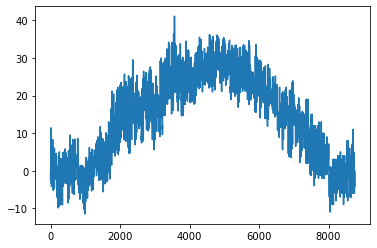

In [15]:
plt.plot(data)

In [34]:
data_diff = np.diff(data, n=1, axis=0)
data_diff.squeeze().shape

(8759,)

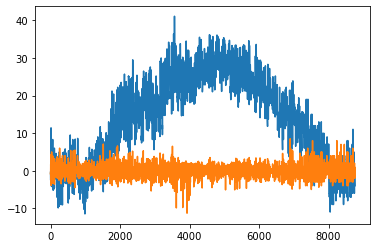

In [29]:
plt.plot(data)
plt.plot(data_diff)

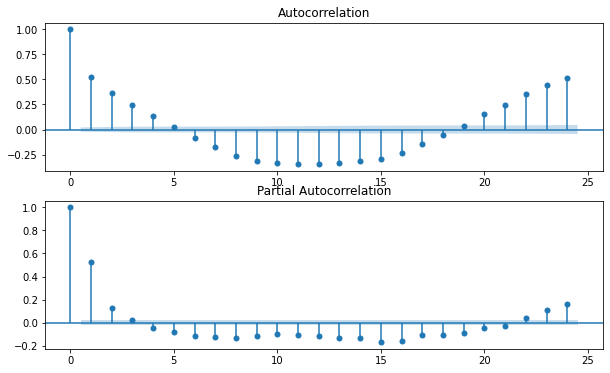

In [30]:
#ARIMA模型分析：
#先把ACF图和PACF图画出来看看：
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(data_diff,lags=24,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(data_diff,  lags=24,ax=ax2)
#判断：ACF图在2之后截尾，而PACF拖尾。模型可以由MA(2)→ARIMA(0,1,2).

In [35]:
r,q,p=sm.tsa.acf(data_diff.squeeze(),qstat=True) #squeeze: 除去size为1的维度
mat=np.c_[range(1,41),r[1:],q,p] #np.c_是按行连接两个矩阵，把两矩阵左右相加，要求行数相等，类似pandas的merge()
table=pd.DataFrame(mat,columns=['lag','AC','Q','Prob(>Q)'])
LB_result=table.iloc[[5,11,17]]
LB_result.set_index('lag',inplace=True)
LB_result
# P值均大于0.05，表明白噪声检验不显著，所以数据经过一阶差分后平稳。

/media/data1/cyh/anaconda3/envs/torch/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/media/data1/cyh/anaconda3/envs/torch/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


,AC,Q,Prob(>Q)
lag,,,
6.0,-0.081470,4311.672255,0.0
12.0,-0.344683,9142.139797,0.0
18.0,-0.056123,12433.231453,0.0
